In [2]:
import matplotlib.pyplot as plt

[0.8159889814615686, 0.8173591325114247, 0.8229554126986478, 0.8035767050970111, 0.8147735320509077, 0.8163524848489114, 0.8271736336325222, 0.8297218433960736, 0.8050433999097737]


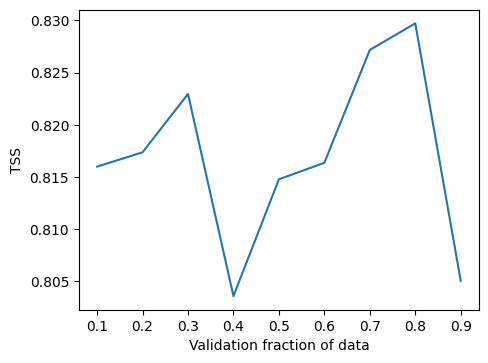

In [3]:
from util import Metric
import numpy as np

data = np.load("./experiments_plot/train_True_cm_p_tuning.npy")
d = [Metric(binary=True, cm=cm) for cm in data]

datashow = [m.tss for m in d]
print(datashow)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
x_ticks = [round(0.1 * i + 0.1, 2) for i in range(9)]
ax.plot(datashow)
ax.set_xticks(range(0, len(x_ticks)))
ax.set_xticklabels(x_ticks)
plt.ylabel("TSS")
plt.xlabel("Validation fraction of data")
plt.show()

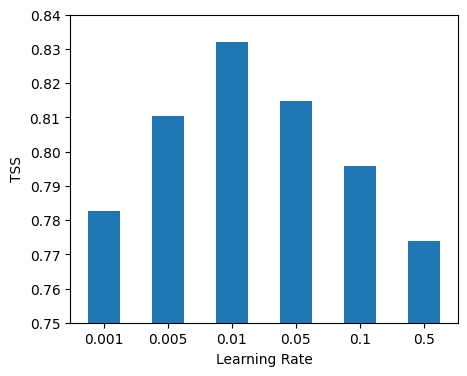

In [9]:
data = np.load("./experiments_plot/train_True_cm_lr_tuning.npy")
d = [Metric(binary=True, cm=cm) for cm in data]

datashow = [m.tss for m in d[1:]]
fig = plt.figure(figsize=(4, 4))
# ax = fig.add_axes([0, 0, 1, 1])
x_ticks = ["0.001", "0.005", "0.01", "0.05", "0.1", "0.5"]
plt.ylabel("TSS")
plt.xlabel("Learning Rate")
plt.bar(x_ticks, datashow, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.show()

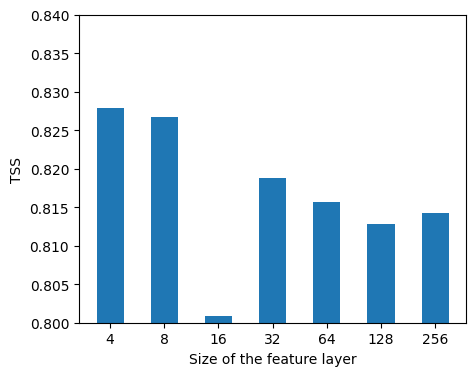

In [34]:
data = np.load("./experiments_plot/train_True_cm_layer_tuning.npy")
d = [Metric(binary=True, cm=cm) for cm in data]

datashow = [m.tss for m in d]
fig = plt.figure(figsize=(5, 4))
# ax = fig.add_axes([0, 0, 1, 1])
x_ticks = ["4", "8", "16", "32", "64", "128", "256"]
plt.ylabel("TSS")
plt.xlabel("Size of the feature layer")
plt.bar(x_ticks, datashow, width=0.5)
plt.ylim(bottom=0.80, top=0.84)
plt.show()